In [126]:
using Plots
using LaTeXStrings
using Printf

In [152]:
using LinearAlgebra

function jacobi(A, b, maxiters = 100, prec = 1.0e-5)
    n = length(b)
    x = 1.0 ./ diag(A) .* b
    # Cria um vetor do mesmo tipo e comprimento de x
    xnovo = similar(x)
    iters = 0
    while iters < maxiters && norm(A*x - b) > prec
        for i = 1:n
            xnovo[i] = b[i]
            for j = 1:i - 1
                xnovo[i] = xnovo[i] - A[i, j]*x[j]
            end
            for j = i + 1:n
                xnovo[i] = xnovo[i] - A[i, j]*x[j]
            end
            xnovo[i] = xnovo[i] / A[i, i]
        end
        # Copia o valor de xnovo sobre x, coordenada a coordenada
        x .= xnovo
        iters = iters + 1
    end
     print(iters)
    return x
end

jacobi (generic function with 3 methods)

In [153]:
A = [-2.5 1; -0.5 1]
b = [-1.5, 0.5]

2-element Vector{Float64}:
 -1.5
  0.5

In [154]:
jacobi(A, b)

14

2-element Vector{Float64}:
 0.99999488
 0.9999936

In [167]:
using LinearAlgebra

function gauss_seidel(A, b, maxiters = 100, prec = 1.0e-5)
    n = length(b)
    x = 1.0 ./ diag(A) .* b
    # Cria um vetor do mesmo tipo e comprimento de x
    xnovo = similar(x)
    iters = 0
    while iters < maxiters && norm(A*x - b) > prec
        for i = 1:n
            xnovo[i] = b[i]
            for j = 1:i - 1
                xnovo[i] = xnovo[i] - A[i, j]*xnovo[j]
            end
            for j = i + 1:n
                xnovo[i] = xnovo[i] - A[i, j]*xnovo[j]
            end
            xnovo[i] = xnovo[i] / A[i, i]
        end
        # Copia o valor de xnovo sobre x, coordenada a coordenada
        x .= xnovo
        print(x)
        iters = iters + 1
    end
    return x
end

gauss_seidel (generic function with 3 methods)

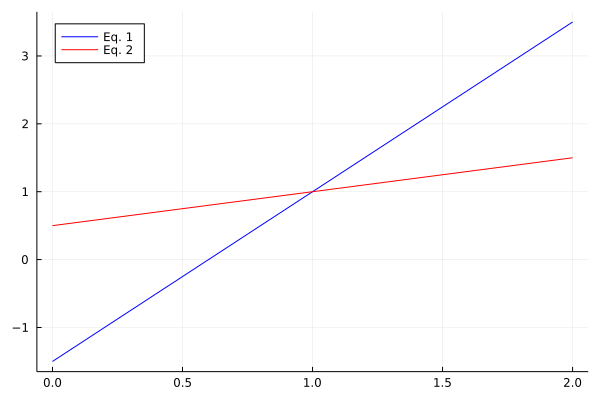

In [168]:
eq1(x) = 2.5*x - 1.5
eq2(x) = 0.5*(1.0 + x)

x = LinRange(0.0, 2.0, 100)
plot(x, eq1.(x), color="blue", label="Eq. 1", legend = :topleft)
plot!(x, eq2.(x), color="red", label="Eq. 2")

In [169]:
gauss_seidel(A, b)

[0.6, 0.8][0.9199999999999999, 0.96][0.984, 0.992][0.9968, 0.9984][0.99936, 0.99968][0.9998720000000001, 0.999936][0.9999743999999999, 0.9999872][0.99999488, 0.99999744][0.999998976, 0.999999488]

2-element Vector{Float64}:
 0.999998976
 0.999999488

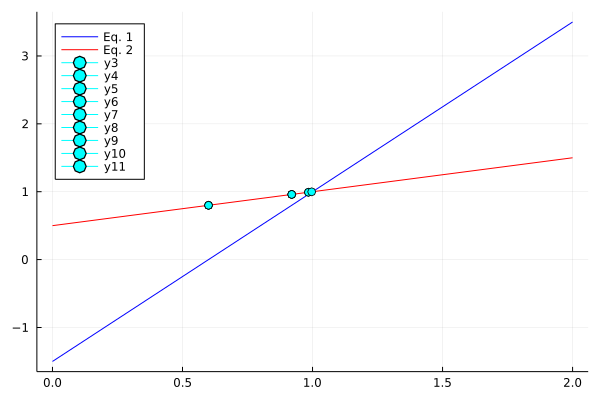

In [172]:
plot!([0.6],[0.8], marker= :o, color =  :cyan)
plot!([0.9199999999999999],[0.96], marker= :o, color =  :cyan)
plot!([0.984],[0.992], marker= :o, color =  :cyan)
plot!([0.9968],[0.9984], marker= :o, color =  :cyan)